# Question1

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_csv('WK11Q1.csv')
print(data)

    Strata  Previous MI  CHF  Shock    Prob  LOS Clinician
0        1            1    1      0  0.0375  4.5     Smith
1        2            1    0      1  0.1488  5.0     Smith
2        3            1    0      0  0.0638  4.0     Smith
3        4            0    1      1  0.2363  3.0     Smith
4        5            0    1      0  0.2888  5.0     Smith
5        6            0    0      1  0.0563  3.0     Smith
6        7            0    0      0  0.1688  4.0     Smith
7        8            1    1      1  0.1658  7.0     Jones
8        9            1    1      0  0.3777  5.0     Jones
9       10            1    0      1  0.0893  4.0     Jones
10      11            1    0      0  0.2083  3.0     Jones
11      12            0    1      1  0.0473  4.0     Jones
12      13            0    1      0  0.0578  5.0     Jones
13      14            0    0      1  0.0293  3.0     Jones
14      15            0    0      0  0.0158  2.0     Jones


In [3]:
data.dtypes

Strata           int64
Previous MI      int64
CHF              int64
Shock            int64
Prob           float64
LOS            float64
Clinician       object
dtype: object

In [4]:
#Change data types to float
data['Strata'] = data['Strata'].astype(float)
data['Previous MI'] = data['Previous MI'].astype(float)
data['CHF'] = data['CHF'].astype(float)
data['Shock'] = data['Shock'].astype(float)
data.dtypes

Strata         float64
Previous MI    float64
CHF            float64
Shock          float64
Prob           float64
LOS            float64
Clinician       object
dtype: object

In [5]:
#Calculate pattern for Dr Smith and Dr Jonese
ExpectedOutcome={}
Diagnoses={}
for md in ['Smith','Jones']:
    #print('Clinician',md)
    data1=data[data['Clinician'] == md]
    #Diognoses[md]=""
    #print(data1['DiagnosesStrg'])
    #print("data1",data1,data1['LOS'].max())
    group_DF=data1.groupby(['Previous MI','CHF','Shock'],as_index=False)
    total = 0
    for name,group in group_DF:
        #print("name",name,"group",group)
        tmpDF=pd.DataFrame()
        tmpDF=pd.DataFrame(group).reset_index()
        maxprob = tmpDF['Prob'].max()
        maxlos = tmpDF['LOS'].max()
        Diagnoses[md,name] = maxlos
        val = maxprob*maxlos
        #print("maxprob",maxprob,"maxlos",maxlos,"val",val)
        total=total+val
    #print("total",total)
    ExpectedOutcome[md]=total
    #print("diagnoese",diagnoses)
print("expected LOS outcomes for MDs taking care of their usual patients:",ExpectedOutcome)
for item in ExpectedOutcome:
    print(item,"expected LOS:",ExpectedOutcome[item])

expected LOS outcomes for MDs taking care of their usual patients: {'Smith': 4.16495, 'Jones': 4.6289}
Smith expected LOS: 4.16495
Jones expected LOS: 4.6289


In [6]:
#Match Clinician and Peer on Common Strata
mdDict={'Jones':'Smith','Smith':'Jones'}
ExpectedOutcomeNew={}
total=0
for md in ['Smith','Jones']:
    #print('Clinician',md)
    data1=data[data['Clinician'] == md]
    group_DF=data1.groupby(['Previous MI','CHF','Shock'],as_index=False)
    total = 0
    for name,group in group_DF:
        #print("name",name,"group",group)
        tmpDF=pd.DataFrame()
        tmpDF=pd.DataFrame(group).reset_index()
        maxprob = tmpDF['Prob'].max()
        
        #if ','.join([mdDict[md],name]) in diagnoses:
        
        try:
            maxlos = Diagnoses[mdDict[md],name]
        #print("found",mdDict[md],"in diagnoses dictionary")
        except:
            maxlos = ExpectedOutcome[md]
            #print("did not find")
        val = maxprob*maxlos
        #print("maxprob",maxprob,"maxlos",maxlos,"val",val)
        total=total+val
    #print("total",total)
    ExpectedOutcomeNew[mdDict[md]]=total
    #print("diagnoese",diagnoses)
print("expected LOS outcomes for MDs taking care of each others patients:")
for item in ExpectedOutcomeNew:
    print(item,"expected LOS when taking care of",mdDict[item],
          "patients:",ExpectedOutcomeNew[item])

expected LOS outcomes for MDs taking care of each others patients:
Jones expected LOS when taking care of Smith patients: 3.8697999999999997
Smith expected LOS when taking care of Jones patients: 4.32882162


# Question2

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from numpy import nan
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_excel('WK11Q2.xlsx')
data.head(20)

,ID,DRG,HCC,Dr,LOS
0,1,1,3,Peer,3
1,2,5,3,Peer,3
2,3,2,3,Clinician,3
3,4,1,1,Clinician,1
4,5,4,2,Peer,3
5,6,2,3,Clinician,3
6,7,8,3,Clinician,4
7,8,1,1,Peer,1
8,9,7,3,Clinician,4
9,10,6,3,Peer,4


In [3]:
###Create a binary column to convert clinician or peer group to 1/0
data['Clinician'] = np.where(data['Dr'] == 'Clinician',1,0)
data["Clinician"] = data["Clinician"].astype(float)
data['Peer'] = np.where(data['Dr']== 'Peer',1,0)
data["Peer"] = data["Peer"].astype(float)

In [4]:
data1 = data[data['Clinician']== 1].reset_index()
data1

,index,ID,DRG,HCC,Dr,LOS,Clinician,Peer
0,2,3,2,3,Clinician,3,1.0,0.0
1,3,4,1,1,Clinician,1,1.0,0.0
2,5,6,2,3,Clinician,3,1.0,0.0
3,6,7,8,3,Clinician,4,1.0,0.0
4,8,9,7,3,Clinician,4,1.0,0.0
...,...,...,...,...,...,...,...,...
76,140,141,3,3,Clinician,3,1.0,0.0
77,141,142,10,1,Clinician,4,1.0,0.0
78,145,146,5,2,Clinician,3,1.0,0.0
79,146,147,7,3,Clinician,4,1.0,0.0


In [5]:
data2 = data[data['Peer']== 1].reset_index()
data2

,index,ID,DRG,HCC,Dr,LOS,Clinician,Peer
0,0,1,1,3,Peer,3,0.0,1.0
1,1,2,5,3,Peer,3,0.0,1.0
2,4,5,4,2,Peer,3,0.0,1.0
3,7,8,1,1,Peer,1,0.0,1.0
4,9,10,6,3,Peer,4,0.0,1.0
...,...,...,...,...,...,...,...,...
65,143,144,10,3,Peer,5,0.0,1.0
66,144,145,9,3,Peer,4,0.0,1.0
67,148,149,9,1,Peer,4,0.0,1.0
68,149,150,2,1,Peer,1,0.0,1.0


In [6]:
NumberC= data1.groupby(['HCC','DRG'],as_index = True).size().reset_index(name='Numb_C')
groupC1 = pd.pivot_table(NumberC,
                       index=['HCC','DRG'],
                       values='Numb_C',                            
                       fill_value = 0,
                       dropna=False,
                       aggfunc=np.sum).reset_index()
groupC1

,HCC,DRG,Numb_C
0,1,1,2
1,1,2,2
2,1,3,3
3,1,4,1
4,1,5,2
5,1,6,5
6,1,7,2
7,1,8,2
8,1,9,1
9,1,10,1


In [7]:
LOSC=data1.groupby(['HCC','DRG'])['LOS'].max().reset_index(name='LOS_C')
groupC2 = pd.pivot_table(LOSC,
                       index=['HCC','DRG'],
                       values='LOS_C',                            
                       fill_value = 0,
                       dropna=False,
                       aggfunc=np.sum).reset_index()
groupC2

,HCC,DRG,LOS_C
0,1,1,1
1,1,2,1
2,1,3,2
3,1,4,2
4,1,5,2
5,1,6,3
6,1,7,3
7,1,8,3
8,1,9,4
9,1,10,4


In [8]:
groupC_final = pd.merge(groupC1, groupC2, how='left',on=['HCC','DRG']).reset_index()
groupC_final = groupC_final.drop(columns = 'index', axis = 1)
groupC_final

,HCC,DRG,Numb_C,LOS_C
0,1,1,2,1
1,1,2,2,1
2,1,3,3,2
3,1,4,1,2
4,1,5,2,2
5,1,6,5,3
6,1,7,2,3
7,1,8,2,3
8,1,9,1,4
9,1,10,1,4


In [9]:
NumberP= data2.groupby(['HCC','DRG'],as_index = True).size().reset_index(name='Numb_P')
groupP1 = pd.pivot_table(NumberP,
                       index=['HCC','DRG'],
                       values='Numb_P',                            
                       fill_value = 0,
                       dropna=False,
                       aggfunc=np.sum).reset_index()
groupP1

,HCC,DRG,Numb_P
0,1,1,2
1,1,2,2
2,1,3,1
3,1,4,1
4,1,5,2
5,1,6,2
6,1,7,2
7,1,8,2
8,1,9,7
9,1,10,8


In [10]:
#Calculate pattern of care for Clinician group which satisfy the conditions of HCC & DRG at the same time
LOSP=data2.groupby(['HCC','DRG'])['LOS'].max().reset_index(name='LOS_P')
groupP2 = pd.pivot_table(LOSP,
                       index=['HCC','DRG'],
                       values='LOS_P',                            
                       fill_value = 0,
                       dropna=False,
                       aggfunc=np.sum).reset_index()
groupP2

,HCC,DRG,LOS_P
0,1,1,1
1,1,2,1
2,1,3,3
3,1,4,2
4,1,5,2
5,1,6,3
6,1,7,3
7,1,8,3
8,1,9,4
9,1,10,4


In [11]:
groupP_final = pd.merge(groupP1, groupP2, how='left',on=['HCC','DRG']).reset_index()
groupP_final = groupP_final.drop(columns = 'index', axis = 1)
groupP_final

,HCC,DRG,Numb_P,LOS_P
0,1,1,2,1
1,1,2,2,1
2,1,3,1,3
3,1,4,1,2
4,1,5,2,2
5,1,6,2,3
6,1,7,2,3
7,1,8,2,3
8,1,9,7,4
9,1,10,8,4


In [12]:
df = pd.merge(groupC_final, groupP_final, how='left',on=['HCC','DRG']).reset_index()
df = df.drop(columns = 'index', axis = 1)
df

,HCC,DRG,Numb_C,LOS_C,Numb_P,LOS_P
0,1,1,2,1,2,1
1,1,2,2,1,2,1
2,1,3,3,2,1,3
3,1,4,1,2,1,2
4,1,5,2,2,2,2
5,1,6,5,3,2,3
6,1,7,2,3,2,3
7,1,8,2,3,2,3
8,1,9,1,4,7,4
9,1,10,1,4,8,4


In [25]:
df1 = pd.merge(df, data, on =['HCC'])
data_df1 = df1[df1['Peer']== 1]
data_df1

,HCC,DRG_x,Numb_C,LOS_C,Numb_P,LOS_P,ID,DRG_y,Dr,LOS,Clinician,Peer
1,1,1,2,1,2,1,8,1,Peer,1,0.0,1.0
2,1,1,2,1,2,1,11,10,Peer,4,0.0,1.0
3,1,1,2,1,2,1,16,5,Peer,2,0.0,1.0
5,1,1,2,1,2,1,25,10,Peer,4,0.0,1.0
6,1,1,2,1,2,1,26,9,Peer,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1502,3,10,2,5,4,5,130,9,Peer,4,0.0,1.0
1503,3,10,2,5,4,5,132,10,Peer,5,0.0,1.0
1504,3,10,2,5,4,5,135,6,Peer,4,0.0,1.0
1507,3,10,2,5,4,5,144,10,Peer,5,0.0,1.0


In [26]:
df2 = pd.merge(df, data, on =['DRG'])
data_df2 = df2[df2['Peer']== 1]
data_df2

,HCC_x,DRG,Numb_C,LOS_C,Numb_P,LOS_P,ID,HCC_y,Dr,LOS,Clinician,Peer
0,1,1,2,1,2,1,1,3,Peer,3,0.0,1.0
2,1,1,2,1,2,1,8,1,Peer,1,0.0,1.0
4,1,1,2,1,2,1,31,3,Peer,3,0.0,1.0
5,1,1,2,1,2,1,33,2,Peer,2,0.0,1.0
6,1,1,2,1,2,1,34,3,Peer,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
443,3,10,2,5,4,5,85,3,Peer,5,0.0,1.0
445,3,10,2,5,4,5,100,1,Peer,4,0.0,1.0
447,3,10,2,5,4,5,124,1,Peer,4,0.0,1.0
449,3,10,2,5,4,5,132,3,Peer,5,0.0,1.0


In [27]:
df3=data_df1[data_df1['LOS_P'].isin(['0'])]
df3

,HCC,DRG_x,Numb_C,LOS_C,Numb_P,LOS_P,ID,DRG_y,Dr,LOS,Clinician,Peer
550,2,2,5,2,0,0,5,4,Peer,3,0.0,1.0
551,2,2,5,2,0,0,14,4,Peer,3,0.0,1.0
556,2,2,5,2,0,0,24,4,Peer,3,0.0,1.0
559,2,2,5,2,0,0,33,1,Peer,2,0.0,1.0
560,2,2,5,2,0,0,37,8,Peer,4,0.0,1.0
565,2,2,5,2,0,0,45,4,Peer,3,0.0,1.0
566,2,2,5,2,0,0,46,4,Peer,3,0.0,1.0
567,2,2,5,2,0,0,50,4,Peer,3,0.0,1.0
571,2,2,5,2,0,0,61,5,Peer,3,0.0,1.0
573,2,2,5,2,0,0,69,3,Peer,2,0.0,1.0


In [28]:
df4=data_df2[data_df2['LOS_P'].isin(['0'])]
df4

,HCC_x,DRG,Numb_C,LOS_C,Numb_P,LOS_P,ID,HCC_y,Dr,LOS,Clinician,Peer
60,2,2,5,2,0,0,66,3,Peer,3,0.0,1.0
64,2,2,5,2,0,0,103,1,Peer,1,0.0,1.0
68,2,2,5,2,0,0,150,1,Peer,1,0.0,1.0
236,2,6,3,3,0,0,10,3,Peer,4,0.0,1.0
240,2,6,3,3,0,0,48,1,Peer,3,0.0,1.0
243,2,6,3,3,0,0,59,3,Peer,4,0.0,1.0
244,2,6,3,3,0,0,63,3,Peer,4,0.0,1.0
249,2,6,3,3,0,0,109,1,Peer,3,0.0,1.0
252,2,6,3,3,0,0,135,3,Peer,4,0.0,1.0
364,2,9,3,4,0,0,23,3,Peer,4,0.0,1.0


In [35]:
LOS1=df3['LOS'].mean()
LOS1

2.933333333333333

In [36]:
LOS2=df4['LOS'].mean()
LOS2

3.8484848484848486

In [37]:
LOS3=data2['LOS'].mean()
LOS3

3.3285714285714287

In [38]:
SUMLOSPAVG= LOS1 * LOS2 / LOS3
print(SUMLOSPAVG)

3.3915116833571766


In [39]:
df['Total_C'] = data1['Clinician'].count()
df['Total_P'] = data2['Peer'].count()
df

,HCC,DRG,Numb_C,LOS_C,Numb_P,LOS_P,Total_C,Total_P
0,1,1,2,1,2,1,81,70
1,1,2,2,1,2,1,81,70
2,1,3,3,2,1,3,81,70
3,1,4,1,2,1,2,81,70
4,1,5,2,2,2,2,81,70
5,1,6,5,3,2,3,81,70
6,1,7,2,3,2,3,81,70
7,1,8,2,3,2,3,81,70
8,1,9,1,4,7,4,81,70
9,1,10,1,4,8,4,81,70


In [40]:
#Calculate Probability for Clinician and Peer group 
df['Prob_C']=df['Numb_C']/df['Total_C']
df['Prob_P']=df['Numb_P']/df['Total_P']
#Solve for 'Prob_C *CASE WHEN LOS_C is null 
df['ClinicianLOS'] = (df['Prob_C']) * df['LOS_C']
#Solve for 'Prob_C*LOS_P'
df['PeerLOS'] = (df['Prob_P']) * df['LOS_P']
df

,HCC,DRG,Numb_C,LOS_C,Numb_P,LOS_P,Total_C,Total_P,Prob_C,Prob_P,ClinicianLOS,PeerLOS
0,1,1,2,1,2,1,81,70,0.024691,0.028571,0.024691,0.028571
1,1,2,2,1,2,1,81,70,0.024691,0.028571,0.024691,0.028571
2,1,3,3,2,1,3,81,70,0.037037,0.014286,0.074074,0.042857
3,1,4,1,2,1,2,81,70,0.012346,0.014286,0.024691,0.028571
4,1,5,2,2,2,2,81,70,0.024691,0.028571,0.049383,0.057143
5,1,6,5,3,2,3,81,70,0.061728,0.028571,0.185185,0.085714
6,1,7,2,3,2,3,81,70,0.024691,0.028571,0.074074,0.085714
7,1,8,2,3,2,3,81,70,0.024691,0.028571,0.074074,0.085714
8,1,9,1,4,7,4,81,70,0.012346,0.100000,0.049383,0.400000
9,1,10,1,4,8,4,81,70,0.012346,0.114286,0.049383,0.457143


In [41]:
data3=df[df['LOS_P'].isin(['0'])]
data3

,HCC,DRG,Numb_C,LOS_C,Numb_P,LOS_P,Total_C,Total_P,Prob_C,Prob_P,ClinicianLOS,PeerLOS
11,2,2,5,2,0,0,81,70,0.061728,0.0,0.123457,0.0
15,2,6,3,3,0,0,81,70,0.037037,0.0,0.111111,0.0
18,2,9,3,4,0,0,81,70,0.037037,0.0,0.148148,0.0
19,2,10,4,4,0,0,81,70,0.049383,0.0,0.197531,0.0


In [48]:
suu=data3['Numb_C'].sum()
suu

15

In [60]:
###Overlap between peer and clinician cases 
SumOverlap = (81 - suu)/df['Numb_C'].sum() *100
SumOverlap

81.48148148148148

In [50]:
df['Prob_P'] = df['Prob_C'].values
df['Prob_P']

0     0.024691
1     0.024691
2     0.037037
3     0.012346
4     0.024691
5     0.061728
6     0.024691
7     0.024691
8     0.012346
9     0.012346
10    0.024691
11    0.061728
12    0.086420
13    0.049383
14    0.024691
15    0.037037
16    0.037037
17    0.024691
18    0.037037
19    0.049383
20    0.037037
21    0.061728
22    0.037037
23    0.024691
24    0.000000
25    0.037037
26    0.074074
27    0.012346
28    0.000000
29    0.024691
Name: Prob_P, dtype: float64

In [51]:
### Select  is not null
df['LOS_P'] = df['LOS_P'].replace(0, nan)
df['LOS_P']=df['LOS_P'].fillna(value=SUMLOSPAVG)
df['LOS_P']

0     1.000000
1     1.000000
2     3.000000
3     2.000000
4     2.000000
5     3.000000
6     3.000000
7     3.000000
8     4.000000
9     4.000000
10    2.000000
11    3.391512
12    2.000000
13    3.000000
14    3.000000
15    3.391512
16    3.000000
17    4.000000
18    3.391512
19    3.391512
20    3.000000
21    3.000000
22    3.000000
23    3.000000
24    3.000000
25    4.000000
26    4.000000
27    4.000000
28    4.000000
29    5.000000
Name: LOS_P, dtype: float64

In [52]:
#Solve for 'Prob_C*LOS_C'
df['PeerLOS'] = (df['Prob_P']) * df['LOS_P']
df

,HCC,DRG,Numb_C,LOS_C,Numb_P,LOS_P,Total_C,Total_P,Prob_C,Prob_P,ClinicianLOS,PeerLOS
0,1,1,2,1,2,1.000000,81,70,0.024691,0.024691,0.024691,0.024691
1,1,2,2,1,2,1.000000,81,70,0.024691,0.024691,0.024691,0.024691
2,1,3,3,2,1,3.000000,81,70,0.037037,0.037037,0.074074,0.111111
3,1,4,1,2,1,2.000000,81,70,0.012346,0.012346,0.024691,0.024691
4,1,5,2,2,2,2.000000,81,70,0.024691,0.024691,0.049383,0.049383
5,1,6,5,3,2,3.000000,81,70,0.061728,0.061728,0.185185,0.185185
6,1,7,2,3,2,3.000000,81,70,0.024691,0.024691,0.074074,0.074074
7,1,8,2,3,2,3.000000,81,70,0.024691,0.024691,0.074074,0.074074
8,1,9,1,4,7,4.000000,81,70,0.012346,0.012346,0.049383,0.049383
9,1,10,1,4,8,4.000000,81,70,0.012346,0.012346,0.049383,0.049383


In [54]:
#continue solving the code
SumClinicianLOS = df['ClinicianLOS'].sum()
print(SumClinicianLOS)
SumPeerLOS = df['PeerLOS'].sum()
print(SumPeerLOS)

2.9629629629629624
3.0478108055599704


In [55]:
PercentMoreEfficient = (SumPeerLOS-SumClinicianLOS)*100/SumPeerLOS
print(PercentMoreEfficient)

2.7838946709626575


# Conclusion

* According to the results, LOS is more in the peer group (3.05) as compared to the clinician (2.96).
* Clinician results for LOS are 2.78% more efficent than peer group.

# Question3

In [37]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [38]:
data=pd.read_excel('WK11Q3.xlsx')
print(data)

    Case Number Length of Stay Unnamed: 2
0           NaN       Expected   Observed
1           1.0              5          4
2           2.0              7          3
3           3.0              6          4
4           4.0              4          3
5           5.0              6          4
6           6.0              8          6
7           7.0              6          3
8           8.0              4          4
9           9.0              4          3
10         10.0              3          3
11         11.0              7          3
12         12.0              4          4
13         13.0              5          3
14         14.0              6          3
15         15.0              4          4
16         16.0              4          4
17         17.0              6          3
18         18.0              3          5
19         19.0              7          5
20         20.0              3          5
21         21.0              6          5
22         22.0              3    

In [39]:
###Drop the empty rows 1, and rename columns
data = data.drop(data.index[[0]])

#Renaming 
data = data.rename(columns={ 'Length of Stay':'Expected_LOS',
                        'Unnamed: 2':'Observed_LOS'},)


#Print dataframe
data

,Case Number,Expected_LOS,Observed_LOS
1,1.0,5,4
2,2.0,7,3
3,3.0,6,4
4,4.0,4,3
5,5.0,6,4
6,6.0,8,6
7,7.0,6,3
8,8.0,4,4
9,9.0,4,3
10,10.0,3,3


In [40]:
data.dtypes

Case Number     float64
Expected_LOS     object
Observed_LOS     object
dtype: object

In [41]:
#Convert data types
data['Case Number'] = data['Case Number'].astype('int')
data['Observed_LOS'] = data['Observed_LOS'].astype('int')
data['Expected_LOS'] = data['Expected_LOS'].astype('int')
data.dtypes

Case Number     int32
Expected_LOS    int32
Observed_LOS    int32
dtype: object

In [42]:
###Calculate the average and std
ObservedLOSMean = data['Observed_LOS'].mean()
print(ObservedLOSMean)
ExpectedLOSMean = data['Expected_LOS'].mean()
print(ExpectedLOSMean)
ObservedLOSStd = data['Observed_LOS'].std()
print(ObservedLOSStd)
ExpectedLOSStd = data['Expected_LOS'].std()
print(ExpectedLOSStd)

3.9
4.8
0.8030115728972386
1.4479474176011817


In [43]:
all_mean = round(data.stack().mean(axis=0,skipna = True),2)
all_mean

8.07

In [44]:
data1 = pd.DataFrame(data,columns = ['Case Number','Expected_LOS','Observed_LOS'])

In [45]:
###Calculate the grand average, difference,and ExpectedVariance
TotalLOS = (data1['Expected_LOS']*data1['Observed_LOS']).sum()
SumObservedLOS = data1['Observed_LOS'].sum()
GrandAverage = TotalLOS/SumObservedLOS
data1['Difference'] = (data1['Expected_LOS']-GrandAverage)**2
data1

,Case Number,Expected_LOS,Observed_LOS,Difference
1,1,5,4,0.029221
2,2,7,3,4.712981
3,3,6,4,1.371101
4,4,4,3,0.687340
5,5,6,4,1.371101
6,6,8,6,10.054862
7,7,6,3,1.371101
8,8,4,4,0.687340
9,9,4,3,0.687340
10,10,3,3,3.345460


In [46]:
stdev = data1['Difference'].std()
stdev

2.176276247575832

In [47]:
###Calculate degrees of freedom
n = len(data)
degrees_of_freedom = n-1
degrees_of_freedom

29

In [48]:
stdev_acd = data.stack().std()
stdev_acd

7.363438376132518

In [49]:
SumDifference = data1['Difference'].sum()
print(SumDifference)
Expected_Variance=SumDifference/degrees_of_freedom
print(Expected_Variance)

60.82533420994959
2.0974253175844684


In [51]:
data1.describe()

,Case Number,Expected_LOS,Observed_LOS,Difference
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,4.800000,3.900000,2.027511
std,8.803408,1.447947,0.803012,2.176276
min,1.000000,3.000000,3.000000,0.029221
25%,8.250000,4.000000,3.000000,0.687340
50%,15.500000,5.000000,4.000000,1.371101
75%,22.750000,6.000000,4.000000,3.345460
max,30.000000,8.000000,6.000000,10.054862


In [52]:
### Prepare Dataframe require to plot graph
data2 = [['Expected',n,ExpectedLOSMean,ExpectedLOSStd],
       ['Observed',n,ObservedLOSMean,ObservedLOSStd]]
df = pd.DataFrame(data2,columns = ['Length of Stay','N','Mean','Std'])
df

,Length of Stay,N,Mean,Std
0,Expected,30,4.8,1.447947
1,Observed,30,3.9,0.803012


In [53]:
df['Sqrt(N)'] = np.sqrt(df['N'])
df['StDev'] = stdev/df['Sqrt(N)']
df

,Length of Stay,N,Mean,Std,Sqrt(N),StDev
0,Expected,30,4.8,1.447947,5.477226,0.397332
1,Observed,30,3.9,0.803012,5.477226,0.397332


In [54]:
T_value = 2.66
df['T_Value'] = T_value
df

,Length of Stay,N,Mean,Std,Sqrt(N),StDev,T_Value
0,Expected,30,4.8,1.447947,5.477226,0.397332,2.66
1,Observed,30,3.9,0.803012,5.477226,0.397332,2.66


In [57]:
data1['Lower Fourth'] = 4
data1['Upper Fourth'] = 6
data1['Fourth_Spreads'] = data1['Upper Fourth'] - data1['Lower Fourth']

In [58]:
### Calculate the upper control limit and lower limit
data1['Upper_Control_Limit'] = data1['Upper Fourth']+data1['Fourth_Spreads']*1.5
data1['Lower_Control_Limit'] = data1['Lower Fourth']-data1['Fourth_Spreads']*1.5
data1

,Case Number,Expected_LOS,Observed_LOS,Difference,Lower Fourth,Upper Fourth,Fourth_Spreads,Upper_Control_Limit,Lower_Control_Limit
1,1,5,4,0.029221,4,6,2,9.0,1.0
2,2,7,3,4.712981,4,6,2,9.0,1.0
3,3,6,4,1.371101,4,6,2,9.0,1.0
4,4,4,3,0.687340,4,6,2,9.0,1.0
5,5,6,4,1.371101,4,6,2,9.0,1.0
6,6,8,6,10.054862,4,6,2,9.0,1.0
7,7,6,3,1.371101,4,6,2,9.0,1.0
8,8,4,4,0.687340,4,6,2,9.0,1.0
9,9,4,3,0.687340,4,6,2,9.0,1.0
10,10,3,3,3.345460,4,6,2,9.0,1.0


In [62]:
data1['ExpectedAvg'] = data1['Expected_LOS'].mean()
data1

,Case Number,Expected_LOS,Observed_LOS,Difference,Lower Fourth,Upper Fourth,Fourth_Spreads,Upper_Control_Limit,Lower_Control_Limit,ExpectedAvg
1,1,5,4,0.029221,4,6,2,9.0,1.0,4.8
2,2,7,3,4.712981,4,6,2,9.0,1.0,4.8
3,3,6,4,1.371101,4,6,2,9.0,1.0,4.8
4,4,4,3,0.687340,4,6,2,9.0,1.0,4.8
5,5,6,4,1.371101,4,6,2,9.0,1.0,4.8
6,6,8,6,10.054862,4,6,2,9.0,1.0,4.8
7,7,6,3,1.371101,4,6,2,9.0,1.0,4.8
8,8,4,4,0.687340,4,6,2,9.0,1.0,4.8
9,9,4,3,0.687340,4,6,2,9.0,1.0,4.8
10,10,3,3,3.345460,4,6,2,9.0,1.0,4.8


In [67]:
#Calculating MR
MR = 0
for n in range(1,len(data1['Expected_LOS'])):
    MR.append(data1['Expected_LOS'][n]-data1['Expected_LOS'][n-1])
print ("MR",str(MR))

AttributeError: 'int' object has no attribute 'append'

In [ ]:
data['MR'] = MR
data['MR'] = data['MR'].abs()
data

In [26]:
#Average of MR
data['MRMean'] = data['MR'].mean()

KeyError: 'MR'

In [27]:
##Upper Control Limit = Average of observations + E * Average of moving range
##Lower Control Limit = Average of observations - E * Average of moving range 
data_X['Upper_Control_Limit'] = data_X['ExpectedLOSMean']+data_X['Fourth_Spreads']*df['T_Value']
data_X['Lower_Control_Limit'] = data_X['ExpectedLOSMean']-data_X['Fourth_Spreads']*df['T_Value']
data_X

NameError: name 'data_X' is not defined

In [28]:
### Prepare Dataframe require to plot Tukey graph
df_Tukey = pd.DataFrame(data,columns = ['Case Number','Observed_LOS','Upper_Control_Limit','Lower_Control_Limit'])
df_Tukey

,Case Number,Observed_LOS,Upper_Control_Limit,Lower_Control_Limit
1,1,4,9.0,1.0
2,2,3,9.0,1.0
3,3,4,9.0,1.0
4,4,3,9.0,1.0
5,5,4,9.0,1.0
6,6,6,9.0,1.0
7,7,3,9.0,1.0
8,8,4,9.0,1.0
9,9,3,9.0,1.0
10,10,3,9.0,1.0


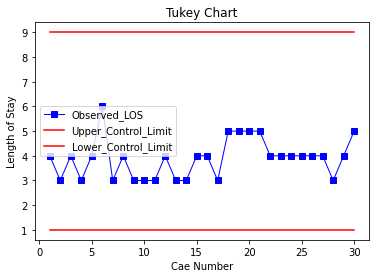

In [29]:
#Plot the Tukey graph
plt.plot('Case Number','Observed_LOS',data=df_Tukey,marker='s',markerfacecolor='b',linewidth=1,color='b')
plt.plot('Case Number','Upper_Control_Limit',data=df_Tukey,markersize = 0,color = 'red')
plt.plot('Case Number','Lower_Control_Limit',data=df_Tukey,markersize = 0,color = 'red')
plt.legend()
plt.title('Tukey Chart')
plt.xlabel('Cae Number')
plt.ylabel('Length of Stay')
plt.show()

In [30]:
### Prepare Dataframe require to plot graph
df_XMR = pd.DataFrame(data,columns = ['Case Number','Observed_LOS','Upper_Control_Limit','Lower_Control_Limit'])
df_XMR

,Case Number,Observed_LOS,Upper_Control_Limit,Lower_Control_Limit
1,1,4,9.0,1.0
2,2,3,9.0,1.0
3,3,4,9.0,1.0
4,4,3,9.0,1.0
5,5,4,9.0,1.0
6,6,6,9.0,1.0
7,7,3,9.0,1.0
8,8,4,9.0,1.0
9,9,3,9.0,1.0
10,10,3,9.0,1.0


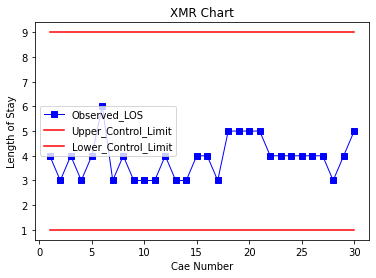

In [31]:
#Plot the XMR graph
plt.plot('Case Number','Observed_LOS',data=df_XMR,marker='s',markerfacecolor='b',linewidth=1,color='b')
plt.plot('Case Number','Upper_Control_Limit',data=df_XMR,markersize = 0,color = 'red')
plt.plot('Case Number','Lower_Control_Limit',data=df_XMR,markersize = 0,color = 'red')
plt.legend()
plt.title('XMR Chart')
plt.xlabel('Cae Number')
plt.ylabel('Length of Stay')
plt.show()

In [32]:
import scipy.stats as stats
stats.shapiro(data.Expected_LOS), stats.shapiro(data.Observed_LOS),\
stats.levene(data.Expected_LOS, data.Observed_LOS)

(ShapiroResult(statistic=0.9141259789466858, pvalue=0.0189365167170763),
 ShapiroResult(statistic=0.8335383534431458, pvalue=0.00028572804876603186),
 LeveneResult(statistic=12.389349112426036, pvalue=0.0008476321723182562))

In [33]:
t, p = stats.ttest_rel(data.Expected_LOS, data.Observed_LOS)
t, p

(3.1134000662442465, 0.004135693224239126)

The p value returned (0.0041356) is lower than threshold 'a' (0.05). Thus the null hypothesis is rejected and we argue that 'Observed_LOS' performance is significantly different and improved compared to the 'Expected_LOS' performance.

# Question4

In [68]:
#Import libraries
import pandas as pd
import numpy as np
import math
from scipy import stats

In [69]:
data=pd.read_csv('WK11Q4.csv')
data.head()

,537156,59,M,6,1072,7,1065,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,2,0.0
0,537156,59,M,6,1072,18,1054,0,0,0,0,0,0,0,0,0,0,3,0.0
1,537156,59,M,6,1072,525,547,0,0,0,0,0,0,0,0,0,0,4,0.0
2,537156,59,M,6,1072,1035,37,0,0,1,0,1,0,0,0,0,0,5,1.0
3,537156,59,M,6,1072,1072,0,0,0,0,0,0,0,0,0,0,1,6,NaN
4,537192,58,M,7,1270,0,1270,0,0,0,0,0,0,0,0,0,0,1,0.0


In [70]:
### Add header name
column_names=["ID","Age","Sex","tAssess","Followed","DaysFirst",
              "DaysLast","uEat","uSit","uGroom","uToilet","uBathe",
              "uWalk","uDress","uBowel","uUrine","EverDead","AssessID",
              "Dead6Months"]
data1 = pd.DataFrame(data.values, columns = column_names)
data1.head()

,ID,Age,Sex,tAssess,Followed,DaysFirst,DaysLast,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,EverDead,AssessID,Dead6Months
0,537156,59,M,6,1072,18,1054,0,0,0,0,0,0,0,0,0,0,3,0
1,537156,59,M,6,1072,525,547,0,0,0,0,0,0,0,0,0,0,4,0
2,537156,59,M,6,1072,1035,37,0,0,1,0,1,0,0,0,0,0,5,1
3,537156,59,M,6,1072,1072,0,0,0,0,0,0,0,0,0,0,1,6,NaN
4,537192,58,M,7,1270,0,1270,0,0,0,0,0,0,0,0,0,0,1,0


In [71]:
### Select Dead6Months is not null
data2=data1
data2=data2[data2['Dead6Months'].notnull()]
data2

,ID,Age,Sex,tAssess,Followed,DaysFirst,DaysLast,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,EverDead,AssessID,Dead6Months
0,537156,59,M,6,1072,18,1054,0,0,0,0,0,0,0,0,0,0,3,0
1,537156,59,M,6,1072,525,547,0,0,0,0,0,0,0,0,0,0,4,0
2,537156,59,M,6,1072,1035,37,0,0,1,0,1,0,0,0,0,0,5,1
4,537192,58,M,7,1270,0,1270,0,0,0,0,0,0,0,0,0,0,1,0
5,537192,58,M,7,1270,80,1190,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306205,1062689,81,M,5,1138,18,1120,0,0,1,1,1,0,1,0,0,0,3,0
1306206,1062689,81,M,5,1138,44,1094,0,0,1,1,1,0,1,0,0,0,4,0
1306208,1062696,72,M,34,2758,0,2758,0,0,1,0,1,0,0,0,0,0,1,0
1306209,1062696,72,M,34,2758,87,2671,0,0,0,0,1,1,0,0,0,0,2,0


In [72]:
###Select age=80, uToilet=1, uWalk=1, other=0
data3=data1[data1['Age']==80]
data3=data3[data3['uToilet']==1]
data3=data3[data3['uWalk']==1]
data3=data3[data3['uEat']==0]
data3=data3[data3['uSit']==0]
data3=data3[data3['uGroom']==0]
data3=data3[data3['uBathe']==0]
data3=data3[data3['uDress']==0]
data3=data3[data3['uBowel']==0]
data3=data3[data3['uUrine']==0]
data3

,ID,Age,Sex,tAssess,Followed,DaysFirst,DaysLast,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,EverDead,AssessID,Dead6Months
368,480545,80,M,4,68,0,68,0,0,0,1,0,1,0,0,0,0,1,1
369,480545,80,M,4,68,7,61,0,0,0,1,0,1,0,0,0,0,2,1
788,670275,80,M,3,8,7,1,0,0,0,1,0,1,0,0,0,0,2,1
35456,842886,80,M,2,384,0,384,0,0,0,1,0,1,0,0,0,0,1,0
56648,573776,80,M,9,1139,947,192,0,0,0,1,0,1,0,0,0,0,4,0
131628,935784,80,M,2,2663,0,2663,0,0,0,1,0,1,0,0,0,0,1,0
138700,754483,80,M,3,408,7,401,0,0,0,1,0,1,0,0,0,0,2,0
429738,953748,80,M,3,699,0,699,0,0,0,1,0,1,0,0,0,0,1,0
429739,953748,80,M,3,699,7,692,0,0,0,1,0,1,0,0,0,0,2,0
951971,298697,80,M,10,320,257,63,0,0,0,1,0,1,0,0,0,0,7,1


In [73]:
###Calculate the estimate of mortality for 80 years old residents with walking disability
data4=data1[data1['Age']==80]
data4=data4[data4['uToilet']==0]
data4=data4[data4['uWalk']==1]
data4=data4[data4['uEat']==0]
data4=data4[data4['uSit']==0]
data4=data4[data4['uGroom']==0]
data4=data4[data4['uBathe']==0]
data4=data4[data4['uDress']==0]
data4=data4[data4['uBowel']==0]
data4=data4[data4['uUrine']==0]
data4

,ID,Age,Sex,tAssess,Followed,DaysFirst,DaysLast,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,EverDead,AssessID,Dead6Months
370,480545,80,M,4,68,18,50,0,0,0,0,0,1,0,0,0,0,3,1
3314,322577,80,M,9,1676,442,1234,0,0,0,0,0,1,0,0,0,0,5,0
3315,322577,80,M,9,1676,449,1227,0,0,0,0,0,1,0,0,0,0,6,0
3316,322577,80,M,9,1676,460,1216,0,0,0,0,0,1,0,0,0,0,7,0
3317,322577,80,M,9,1676,485,1191,0,0,0,0,0,1,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292275,1148899,80,M,2,1159,0,1159,0,0,0,0,0,1,0,0,0,0,1,0
1293184,876367,80,M,7,292,18,274,0,0,0,0,0,1,0,0,0,0,3,0
1293993,479657,80,M,2,3826,0,3826,0,0,0,0,0,1,0,0,0,0,1,0
1298156,633354,80,M,3,1057,0,1057,0,0,0,0,0,1,0,0,0,0,1,0


In [74]:
##Calculate the probility
ProbDead6Months1=data4['Dead6Months'].mean()
ProbDead6Months1

0.13715953307392997

In [75]:
###Calculate the estimate of mortality for residents with toileting disability
data5=data1
data5=data5[data5['uToilet']==1]
data5=data5[data5['uWalk']==0]
data5=data5[data5['uEat']==0]
data5=data5[data5['uSit']==0]
data5=data5[data5['uGroom']==0]
data5=data5[data5['uBathe']==0]
data5=data5[data5['uDress']==0]
data5=data5[data5['uBowel']==0]
data5=data5[data5['uUrine']==0]
data5

,ID,Age,Sex,tAssess,Followed,DaysFirst,DaysLast,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,EverDead,AssessID,Dead6Months
7052,462750,61,M,2,7,0,7,0,0,0,1,0,0,0,0,0,0,1,0
8568,434901,89,M,4,43,43,0,0,0,0,1,0,0,0,0,0,0,4,0
9155,396356,49,M,15,2392,979,1413,0,0,0,1,0,0,0,0,0,0,8,0
10354,340230,81,M,2,87,87,0,0,0,0,1,0,0,0,0,0,0,2,0
16822,526439,67,M,3,2246,0,2246,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302454,458120,82,M,7,563,563,0,0,0,0,1,0,0,0,0,0,0,7,0
1303111,449257,57,M,54,4117,78,4039,0,0,0,1,0,0,0,0,0,0,2,0
1303112,449257,57,M,54,4117,162,3955,0,0,0,1,0,0,0,0,0,0,3,0
1303130,449257,57,M,54,4117,1618,2499,0,0,0,1,0,0,0,0,0,0,21,0


In [76]:
##Calculate the probility
ProbDead6Months2=data5['Dead6Months'].mean()
ProbDead6Months2

0.1407942238267148

In [77]:
###Calculate the estimate of mortality from 2 probalities
Prob_estimate_6Months=ProbDead6Months1*ProbDead6Months2
Prob_estimate_6Months

0.01931126999957859

# Question5

In [109]:
#Import libraries
import pandas as pd
import numpy as np
import math
from fractions import Fraction
pd.set_option('display.max_columns', None)

In [110]:
data=pd.read_csv('WK11Q5.csv')
data.head()

,ID,Age,NursingHome,Sex,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,rEat,rWalk,rSit,rGroom,rToilet,rBathe,rDress,rBowel,rUrine,Dead,nRecovery
0,1106742,50,B,M,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1106776,60,B,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1106778,80,A,M,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1106878,55,A,M,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,8
4,1106901,60,B,M,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
###"u" means unable, "r" means recovery from disabilities, "nRecovery" means number of disabilities recovered from
data=data.rename(columns={'nRecovery':'Recovered'},)
data.dtypes

ID              int64
Age             int64
NursingHome    object
Sex            object
uEat            int64
uSit            int64
uGroom          int64
uToilet         int64
uBathe          int64
uWalk           int64
uDress          int64
uBowel          int64
uUrine          int64
rEat            int64
rWalk           int64
rSit            int64
rGroom          int64
rToilet         int64
rBathe          int64
rDress          int64
rBowel          int64
rUrine          int64
Dead            int64
Recovered       int64
dtype: object

In [112]:
bins= [1,25,50,75,100]
labels = ['AgeGroup1-25','AgeGroup25-50','AgeGroup50-75','AgeGroup75-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data

,ID,Age,NursingHome,Sex,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,rEat,rWalk,rSit,rGroom,rToilet,rBathe,rDress,rBowel,rUrine,Dead,Recovered,AgeGroup
0,1106742,50,B,M,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AgeGroup50-75
1,1106776,60,B,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AgeGroup50-75
2,1106778,80,A,M,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,AgeGroup75-100
3,1106878,55,A,M,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,8,AgeGroup50-75
4,1106901,60,B,M,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,AgeGroup50-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212518,289657,75,B,M,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AgeGroup75-100
212519,289674,75,B,M,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AgeGroup75-100
212520,289691,50,B,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AgeGroup50-75
212521,289727,65,B,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,AgeGroup50-75


In [113]:
data.dtypes

ID                int64
Age               int64
NursingHome      object
Sex              object
uEat              int64
uSit              int64
uGroom            int64
uToilet           int64
uBathe            int64
uWalk             int64
uDress            int64
uBowel            int64
uUrine            int64
rEat              int64
rWalk             int64
rSit              int64
rGroom            int64
rToilet           int64
rBathe            int64
rDress            int64
rBowel            int64
rUrine            int64
Dead              int64
Recovered         int64
AgeGroup       category
dtype: object

In [114]:
data['Male'] = np.where(data['Sex'] == 'M',1,0)
data['Male'] = data['Male'].astype(int)
data['Recovered'] = data['Recovered'].astype(int)
data1 = pd.DataFrame(data,columns = ['AgeGroup','Male','NursingHome','Age','uEat','uSit','uGroom','uToilet',
                                     'uBathe','uWalk','uDress','uBowel','uUrine','Recovered'])
data1

,AgeGroup,Male,NursingHome,Age,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,Recovered
0,AgeGroup50-75,1,B,50,0,1,1,1,1,1,0,0,0,0
1,AgeGroup50-75,1,B,60,0,0,0,0,1,0,0,0,0,0
2,AgeGroup75-100,1,A,80,0,0,0,0,1,1,0,0,0,1
3,AgeGroup50-75,1,A,55,1,1,1,1,1,1,1,1,0,8
4,AgeGroup50-75,1,B,60,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212518,AgeGroup75-100,1,B,75,0,0,1,0,1,0,0,0,0,0
212519,AgeGroup75-100,1,B,75,0,0,0,0,1,0,0,0,0,0
212520,AgeGroup50-75,1,B,50,0,0,0,0,0,0,0,0,0,0
212521,AgeGroup50-75,1,B,65,0,0,0,0,0,0,0,0,0,0


In [121]:
pd.crosstab(data1，index = ['AgeGroup']，columns=['uEat','uSit','uGroom','uToilet','uBathe','uWalk','uDress','uBowel','uUrine'],values =['Recovered']，aggfunc ='sum',margins=True)

SyntaxError: invalid character in identifier (<ipython-input-121-f5d1f318afa7>, line 1)

In [ ]:
pd.pivot_table(

In [87]:
data1=data2.groupby(['AgeGroup'])['Recovered'].count()
data1

KeyError: 'Column not found: Recovered'

In [88]:
data['Sum_Recovered']=data['uEat']+data['uSit']+data['uGroom']+data['uToilet']+data['uBathe']+data['uWalk']+data['uDress']+data['uBowel']+data['uUrine']
data['Sum_Recovered']

0         5
1         1
2         2
3         8
4         5
         ..
212518    2
212519    1
212520    0
212521    0
212522    1
Name: Sum_Recovered, Length: 212523, dtype: int64

In [ ]:
data1 = pd.DataFrame(data,columns = ['AgeGroup','Male','NursingHome','Age','uEat','uSit','uGroom','uToilet',
                                     'uBathe','uWalk','uDress','uBowel','uUrine','Recovered'])
data1

In [ ]:
LOSP=data1.groupby(['HCC','DRG'])['LOS'].size().reset_index(name='LOS_P')
groupP2 = pd.pivot_table(LOSP,
                       index=['HCC','DRG'],
                       values='LOS_P',                            
                       fill_value = 0,
                       dropna=False,
                       aggfunc=np.sum).reset_index()
groupP2

In [103]:
pd.crosstab(data1['uEat','uSit','uGroom','uToilet','uBathe','uWalk','uDress','uBowel','uUrine'])

False

In [126]:
###Total Number of patients recovered
data2=data[data['rEat']==0].count()
data2

ID             195770
Age            195770
NursingHome    195770
Sex            195770
uEat           195770
uSit           195770
uGroom         195770
uToilet        195770
uBathe         195770
uWalk          195770
uDress         195770
uBowel         195770
uUrine         195770
rEat           195770
rWalk          195770
rSit           195770
rGroom         195770
rToilet        195770
rBathe         195770
rDress         195770
rBowel         195770
rUrine         195770
Dead           195770
Recovered      195770
AgeGroup       195636
Male           195770
dtype: int64

In [127]:
data1.loc[(data1.sum(axis=1) != 0), (data1.sum(axis=0) != 0)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [67]:
data2['Recovered']=data2['Recovered'].sum()
data2

,AgeGroup,Male,NursingHome,uEat,uSit,uGroom,uToilet,uBathe,uWalk,uDress,uBowel,uUrine,Recovered
9,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
10,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
21,AgeGroup75-100,1,B,0,0,0,0,0,0,0,0,0,0
35,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
40,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212502,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
212509,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
212510,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0
212520,AgeGroup50-75,1,B,0,0,0,0,0,0,0,0,0,0


# Question6

In [ ]:
#Import libraries
import pandas as pd
import numpy as np

In [79]:
Smith=pd.read_excel('DrSmith.xlsx')
Jones=pd.read_excel('DrJones.xlsx')
Type=pd.read_excel('Type of Patients.xlsx')
print(Smith)
print(Jones)
print(Type)

   Patient  Previous MI  CHF  Shock  LOS
0        1            1    1      0    4
1        2            1    1      0    5
2        3            1    0      0    4
3        4            1    0      1    5
4        5            1    0      1    4
5        6            1    0      1    4
6        7            1    0      1    5
7        8            0    0      0    2
8        9            0    0      0    2
9       10            0    0      0    1
   Patient  Previous MI  CHF  Shock  LOS
0        1            1    1      0    5
1        2            1    1      0    5
2        3            1    1      0    5
3        4            1    1      1    5
4        5            1    0      1    5
5        6            1    0      1    5
6        7            1    0      1    5
7        8            1    0      0    4
8        9            0    0      0    2
9       10            0    0      0    2
  Patient Type  MI  CHF  Shock
0            A   1    1      0
1            B   1    0      0
2    

In [80]:
SmithTypeA=Smith[(Smith['Previous MI']==1)&(Smith['CHF']==1)&(Smith['Shock']==0)]
SmithTypeB=Smith[(Smith['Previous MI']==1)&(Smith['CHF']==0)&(Smith['Shock']==0)]
SmithTypeC=Smith[(Smith['Previous MI']==1)&(Smith['CHF']==0)&(Smith['Shock']==1)]
SmithTypeD=Smith[(Smith['Previous MI']==1)&(Smith['CHF']==1)&(Smith['Shock']==1)]
SmithTypeE=Smith[(Smith['Previous MI']==0)&(Smith['CHF']==0)&(Smith['Shock']==0)]

SmithTypeA
SmithTypeB
SmithTypeC
SmithTypeD
SmithTypeE

,Patient,Previous MI,CHF,Shock,LOS
7,8,0,0,0,2
8,9,0,0,0,2
9,10,0,0,0,1


In [81]:
SA_AVG=SmithTypeA["LOS"].mean()
SB_AVG=SmithTypeB["LOS"].mean()
SC_AVG=SmithTypeC["LOS"].mean()
SD_AVG=SmithTypeD["LOS"].mean()
SE_AVG=SmithTypeE["LOS"].mean()

print(SA_AVG)
print(SB_AVG)
print(SC_AVG)
print(SD_AVG)
print(SE_AVG)

4.5
4.0
4.5
nan
1.6666666666666667


In [82]:
A=(JonesTypeA["LOS"].count())/10
B=(JonesTypeB["LOS"].count())/10
C=(JonesTypeC["LOS"].count())/10
D=(JonesTypeD["LOS"].count())/10
E=(JonesTypeE["LOS"].count())/10

print(A)
print(B)
print(C)
print(D)
print(E)

0.2
0.1
0.4
0.0
0.3


In [83]:
Smith_LOS=[SA_AVG,SB_AVG,SC_AVG,SD_AVG,SE_AVG]
Smith_Prob=[A,B,C,D,E]

Type
Type['Dr.Smith LOS']=Smith_LOS
Type
Type['Dr.Smith Prob']=Smith_Prob
Type

,Patient Type,MI,CHF,Shock,Dr.Smith LOS,Dr.Smith Prob
0,A,1,1,0,4.500000,0.2
1,B,1,0,0,4.000000,0.1
2,C,1,0,1,4.500000,0.4
3,D,1,1,1,NaN,0.0
4,E,0,0,0,1.666667,0.3


In [84]:
JonesTypeA=Jones[(Jones['Previous MI']==1)&(Jones['CHF']==1)&(Jones['Shock']==0)]
JonesTypeB=Jones[(Jones['Previous MI']==1)&(Jones['CHF']==0)&(Jones['Shock']==0)]
JonesTypeC=Jones[(Jones['Previous MI']==1)&(Jones['CHF']==0)&(Jones['Shock']==1)]
JonesTypeD=Jones[(Jones['Previous MI']==1)&(Jones['CHF']==1)&(Jones['Shock']==1)]
JonesTypeE=Jones[(Jones['Previous MI']==0)&(Jones['CHF']==0)&(Jones['Shock']==0)]

JonesTypeA
JonesTypeB
JonesTypeC
JonesTypeD
JonesTypeE

,Patient,Previous MI,CHF,Shock,LOS
8,9,0,0,0,2
9,10,0,0,0,2


In [85]:
JA_AVG=JonesTypeA["LOS"].mean()
JB_AVG=JonesTypeB["LOS"].mean()
JC_AVG=JonesTypeC["LOS"].mean()
JD_AVG=JonesTypeD["LOS"].mean()
JE_AVG=JonesTypeE["LOS"].mean()

print(JA_AVG)
print(JB_AVG)
print(JC_AVG)
print(JD_AVG)
print(JE_AVG)

5.0
4.0
5.0
5.0
2.0


In [86]:
A1=(JonesTypeA["LOS"].count())/10
B1=(JonesTypeB["LOS"].count())/10
C1=(JonesTypeC["LOS"].count())/10
D1=(JonesTypeD["LOS"].count())/10
E1=(JonesTypeE["LOS"].count())/10

print(A1)
print(B1)
print(C1)
print(D1)
print(E1)

0.3
0.1
0.3
0.1
0.2


In [87]:
Jones_LOS=[JA_AVG,JB_AVG,JC_AVG,JD_AVG,JE_AVG]
Jones_Prob=[A1,B1,C1,D1,E1]

Type
Type['Dr.Jones LOS']=Jones_LOS
Type
Type['Dr.Jones Prob']=Jones_Prob
Type

,Patient Type,MI,CHF,Shock,Dr.Smith LOS,Dr.Smith Prob,Dr.Jones LOS,Dr.Jones Prob
0,A,1,1,0,4.500000,0.2,5.0,0.3
1,B,1,0,0,4.000000,0.1,4.0,0.1
2,C,1,0,1,4.500000,0.4,5.0,0.3
3,D,1,1,1,NaN,0.0,5.0,0.1
4,E,0,0,0,1.666667,0.3,2.0,0.2


In [88]:
Outcome_Smith=(SA_AVG*A)+(SB_AVG*B)+(SC_AVG*C)+(SE_AVG*E)
Outcome_Jones_with_Smith=(JA_AVG*A)+(JB_AVG*B)+(JC_AVG*C)+(JD_AVG*D)+(JE_AVG*E)
print(Outcome_Smith)
print(Outcome_Jones_with_Smith)

3.6
4.0


# Conclusion

* The outcome for Dr. Smith is 3.6
* The outcome for Dr. Jones with Dr. Smith’s patients is 4
* Dr. Smith is more efficient


# Question 7

In [90]:
import statsmodels.api as sm
from sklearn import linear_model

In [91]:
Smith

,Patient,Previous MI,CHF,Shock,LOS
0,1,1,1,0,4
1,2,1,1,0,5
2,3,1,0,0,4
3,4,1,0,1,5
4,5,1,0,1,4
5,6,1,0,1,4
6,7,1,0,1,5
7,8,0,0,0,2
8,9,0,0,0,2
9,10,0,0,0,1


In [92]:
x=Smith[['Previous MI','CHF','Shock']]
y=Smith['LOS']

In [93]:
regr=linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [94]:
print('Intercept:',regr.intercept_)
print('Coefficients:',regr.coef_)

Intercept: 1.6666666666666659
Coefficients: [2.33333333 0.5        0.5       ]


In [96]:
intercept = regr.intercept_
previousMI_coef = regr.coef_[0]
CHF_coef=regr.coef_[1]
Shock_coef=regr.coef_[2]

In [97]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

C:\Users\zhuji\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     14.98
Date:                Fri, 04 Dec 2020   Prob (F-statistic):            0.00341
Time:                        20:45:59   Log-Likelihood:                -6.5424
No. Observations:                  10   AIC:                             21.08
Df Residuals:                       6   BIC:                             22.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6667      0.347      4.804      0.003       0.818       2.516
Previous MI     2.3333      0.694      3.363      0.015       0.635       4.031
CHF             0.5000      0.736      0.679      0.522      -1.301       2.301
Shock           0.5000      0.672      0.744      0.485      -1.144       2.144
==============================================================================
Omnibus:                        5.797   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                1.325
Skew:                          -0.220   Prob(JB):                        0.516
Kurtosis:                       1.272   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
Jones['LOS_Smith']=round(intercept + previousMI_coef*Jones['Previous MI']
                        + CHF_coef*Jones['CHF']+Shock_coef*Jones['Shock'],2)
Jones

,Patient,Previous MI,CHF,Shock,LOS,LOS_Smith
0,1,1,1,0,5,4.50
1,2,1,1,0,5,4.50
2,3,1,1,0,5,4.50
3,4,1,1,1,5,5.00
4,5,1,0,1,5,4.50
5,6,1,0,1,5,4.50
6,7,1,0,1,5,4.50
7,8,1,0,0,4,4.00
8,9,0,0,0,2,1.67
9,10,0,0,0,2,1.67


# Conclusion

* Based on the model build from Dr.Smith's outcomes, the predicted LOS would be 5 days.
* This is the same LOS as when the patients was seen by Dr.Jones